# BLG450 Yapay Zeka ###
## 2022 - 2023 Bahar Dönemi - Final Ödevi
### CNN - 1

Bu yapay zeka projesi, bir **CNN** (**Convolutional Neural Network**) modeli kullanarak bir **insan** görselinin **cinsiyetini** (erkek veya kadın) **tahmin etmek** için eğitilmiş. Eğitim için, toplamda **3000** görüntüden oluşan bir **veri kümesi** kullanılmış, **1500 kadın** ve **1500 erkek** görüntüsü bulunmaktadır.

Model, **ardışık** bir yapıda tanımlanmış ve çeşitli **konvolüsyon**, **havuzlama** ve **yoğun katmanları** içermektedir. **Kayıp fonksiyonu** olarak **BinaryCrossentropy** ve **optimize edici** olarak **Adam** kullanılarak model derlenmiştir. Eğitim sırasında, **eğitim** ve **doğrulama** veri kümeleri kullanılarak modelin **performansı** izlenmiş ve **kayıp** ile **doğruluk** metrikleri **grafiğe** dökülmüştür.

Eğitim süreci tamamlandıktan sonra, **model test veri kümesi** üzerinde değerlendirilmiş ve **Precision**, **Recall** ve **BinaryAccuracy** metrikleri hesaplanmıştır. Son olarak, modele **yeni bir görüntü** verilerek **tahmin yapılması** sağlanmış ve tahmin sonucu ekrana yazdırılmıştır.

Proje ayrıca, **eğitilen modelin kaydedilmesi** ve yeniden yüklenmesi örneklendiği için modelin tekrar kullanılabilirliği de gösterilmiştir.

### Credits
Bu yapay zeka projesi, aşağıdaki kaynaklardan yararlanılarak oluşturulmuştur:

- [IMFDB Dataset](http://cvit.iiit.ac.in/projects/IMFDB/): Bu kaynak, proje için kullanılan veri kümesini oluşturmak amacıyla kullanılmıştır. Bu veri kümesi, **34 binden** fazla görsel içermektedir ve genellikle **Hintli aktörlerin** videolarındaki sahnelerden alınan **yüz görüntülerinden** oluşmaktadır. Veri kümesi içerisindeki **düşük çözünürlüklü** ve **farklı uzantılı** görseller ayıklanarak, aktörlerin resimleri eşit sayıda olacak şekilde filtrelenmiş ve sonuç olarak **1500 erkek** ve **1500 kadın** görseli elde edilmiştir.
- [Keras Optimizers](https://keras.io/api/optimizers/): Bu kaynak, Keras kütüphanesinin **optimizer** (optimize edici) fonksiyonlarından yararlanılmıştır. Proje içerisinde modelin derlenmesi için optimizer olarak **Adam** optimizasyon algoritması kullanılmıştır.
- [Keras Losses](https://keras.io/api/losses/): Bu kaynak, Keras kütüphanesinin **loss** (kayıp) **fonksiyonlarından** yararlanılmıştır. Proje içerisinde **BinaryCrossentropy** kayıp fonksiyonu kullanılarak modelin eğitimi gerçekleştirilmiştir.
- [Keras Metrics](https://keras.io/api/metrics/): Bu kaynak, Keras kütüphanesinin **metrik fonksiyonlarından** yararlanılmıştır. Modelin performansını ölçmek için **Precision, Recall** ve **BinaryAccuracy** gibi metrikler kullanılmıştır.
- [TensorFlow](https://www.tensorflow.org): Bu kaynak, proje içerisinde kullanılan TensorFlow kütüphanesinin resmi dokümantasyonunu içermektedir. TensorFlow, derin öğrenme modelleri oluşturmak, eğitmek ve değerlendirmek için kullanılan bir açık kaynaklı bir makine öğrenimi kütüphanesidir. Projede, TensorFlow kullanarak **CNN** (Convolutional Neural Network) mimarisi oluşturulmuş, **model derlenmiş**, **eğitilmiş**, **değerlendirilmiş** ve tahminler yapılmıştır. TensorFlow, bu projedeki yapay zeka modelinin temelini oluşturan ve çeşitli işlemlerin gerçekleştirilmesini sağlayan önemli bir araçtır.
- [Adam Optimizasyon Algoritması](https://optimization.cbe.cornell.edu/index.php?title=Adam#:~:text=Adam.,RMSP%20which%20are%20explained%20below.): Adam, adaptif moment tahmini (adaptive moment estimation) yöntemini kullanarak **iteratif bir optimize algoritmasıdır**. Adam, **gradient tabanlı** optimizasyon yöntemlerinden biridir ve genellikle derin öğrenme modellerinin eğitiminde tercih edilen bir optimizasyon algoritmasıdır.
- [ReLU (Rectified Linear Unit) Aktivasyon Fonksiyonu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)): ReLU, yapay sinir ağlarında sıkça kullanılan bir **aktivasyon fonksiyonudur**. ReLU, **negatif girdi** değerlerini **sıfır** olarak kabul ederken, **pozitif girdi** değerlerini **doğrudan aktarılan** değer olarak korur. Matematiksel olarak, ReLU fonksiyonu **f(x) = max(0, x)** şeklinde ifade edilir.
- [Sigmoid Aktivasyon Fonksiyonu](https://en.wikipedia.org/wiki/Sigmoid_function): Sigmoid, yapay sinir ağlarında kullanılan popüler bir **aktivasyon** fonksiyonudur. Matematiksel olarak, Sigmoid fonksiyonu **f(x) = \frac{1}{1 + e^{-x}}** şeklinde ifade edilir.



![dataset](http://cvit.iiit.ac.in/projects/IMFDB/faces5.png)
![keras](https://pyimagesearch.com/wp-content/uploads/2019/10/keras_vs_tfdotkeras_header.png)

##### Bu kısımda gerekli kütüphaneler ve modüller import ediliyor.

In [4]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import cv2 as cv
import imghdr

##### Bu bölümde GPU kullanımı ayarlanıyor ve GPU bellek büyümesi etkinleştiriliyor.

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

##### "image_dataset_from_directory" fonksiyonu kullanılarak 'data' klasöründeki görüntüler alınıyor ve veri kümesi oluşturuluyor.

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 3000 files belonging to 2 classes.


##### "as_numpy_iterator" metodu, veri kümesini NumPy dizilerine dönüştürüyor ve bir döngüde kullanılmak üzere bir yinelenebilir nesne döndürüyor.

In [7]:
data_iterator = data.as_numpy_iterator()

##### "next" metodu, yinelenebilir nesneden bir sonraki öğeyi alıyor. Bu durumda, veri kümesinden bir örnek alınıyor.

In [8]:
batch = data_iterator.next()

##### Bu kısımda, veri kümesinden alınan 4 örneğin görüntüleri görselleştiriliyor.

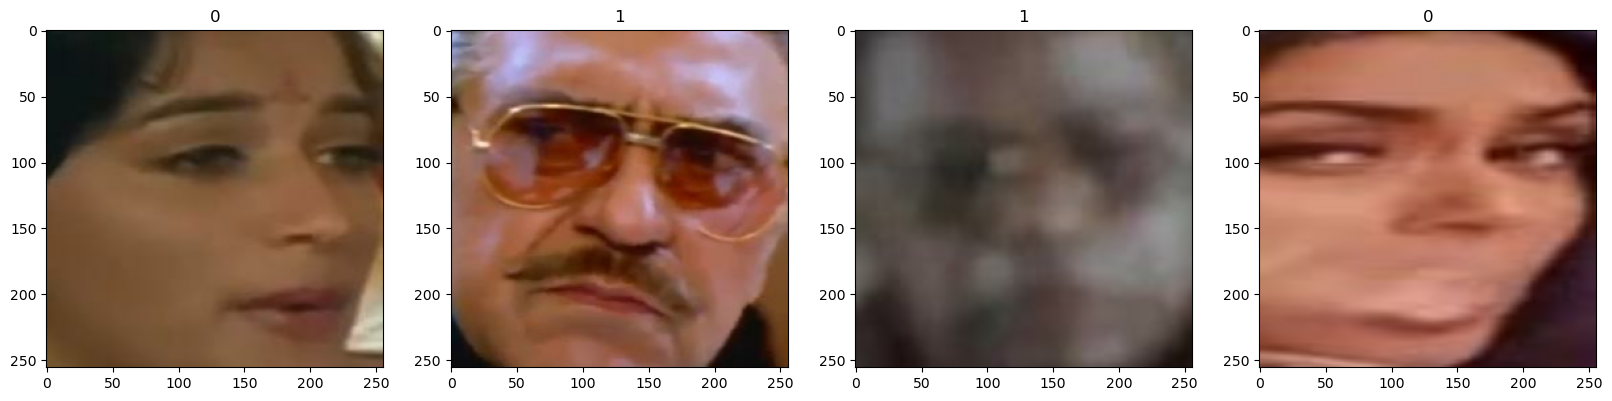

In [114]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

##### "map" metodu, veri kümesindeki her örneği dönüştürmek için bir fonksiyon uyguluyor. Bu durumda, görüntülerin piksel değerleri [0,1] aralığına ölçekleniyor.

In [10]:
data = data.map(lambda x, y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[1.25490203e-01, 1.60784319e-01, 7.84313753e-02],
          [1.25490203e-01, 1.60784319e-01, 7.84313753e-02],
          [1.24203429e-01, 1.59497544e-01, 7.71446079e-02],
          ...,
          [1.96078438e-02, 4.31372561e-02, 0.00000000e+00],
          [1.96078438e-02, 4.31372561e-02, 0.00000000e+00],
          [1.96078438e-02, 4.31372561e-02, 0.00000000e+00]],
 
         [[1.25490203e-01, 1.60784319e-01, 7.84313753e-02],
          [1.25490203e-01, 1.60784319e-01, 7.84313753e-02],
          [1.24203429e-01, 1.59497544e-01, 7.71446079e-02],
          ...,
          [1.96078438e-02, 4.31372561e-02, 0.00000000e+00],
          [1.96078438e-02, 4.31372561e-02, 0.00000000e+00],
          [1.96078438e-02, 4.31372561e-02, 0.00000000e+00]],
 
         [[1.21698834e-01, 1.56992957e-01, 7.46400133e-02],
          [1.21698834e-01, 1.56992957e-01, 7.46400133e-02],
          [1.20483160e-01, 1.55777276e-01, 7.34243318e-02],
          ...,
          [1.96078438e-02, 4.31372561e-02, 0.0000

##### Veri kümesi, eğitim, doğrulama ve test kümelerine bölünüyor.

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

##### Bu bölümde CNN modeli tanımlanıyor. Ardışık bir model kullanılarak, farklı katmanlar (Conv2D, MaxPooling2D, Flatten, Dense) ekleniyor.

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##### Model derleniyor, kayıp fonksiyonu olarak BinaryCrossentropy ve optimize edici olarak Adam kullanılıyor.

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

##### Modelin özetini gösteren bir özet tablosu bastırılıyor.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##### TensorBoard gerçekleştirmek için kullanılan bir geri çağırma oluşturuluyor.

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

##### Model eğitimi yapılıyor. Eğitim ve doğrulama veri kümeleri kullanılıyor.

In [20]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 [==============================] - 82s 1s/step - loss: 0.6450 - accuracy: 0.6490 - val_loss: 0.5214 - val_accuracy: 0.7778
Epoch 2/10
65/65 [==============================] - 82s 1s/step - loss: 0.4354 - accuracy: 0.8000 - val_loss: 0.3800 - val_accuracy: 0.8351
Epoch 3/10
65/65 [==============================] - 79s 1s/step - loss: 0.3814 - accuracy: 0.8337 - val_loss: 0.3871 - val_accuracy: 0.8385
Epoch 4/10
65/65 [==============================] - 103s 2s/step - loss: 0.3318 - accuracy: 0.8606 - val_loss: 0.3013 - val_accuracy: 0.8715
Epoch 5/10
65/65 [==============================] - 85s 1s/step - loss: 0.2894 - accuracy: 0.8721 - val_loss: 0.3393 - val_accuracy: 0.8628
Epoch 6/10
65/65 [==============================] - 81s 1s/step - loss: 0.2581 - accuracy: 0.8928 - val_loss: 0.2776 - val_accuracy: 0.8854
Epoch 7/10
65/65 [==============================] - 80s 1s/step - loss: 0.2280 - accuracy: 0.9062 - val_loss: 0.3184 - val_accuracy: 0.8698
Epoch 8/10
65/65 [=

##### Eğitim ve doğrulama kaybı grafiği çizdiriliyor.

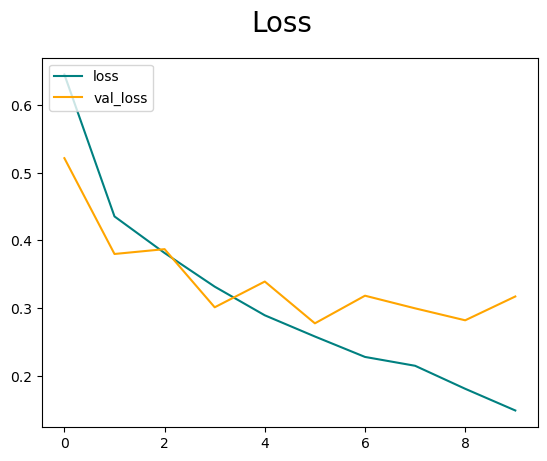

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##### Eğitim ve doğrulama doğruluk grafiği çizdiriliyor.

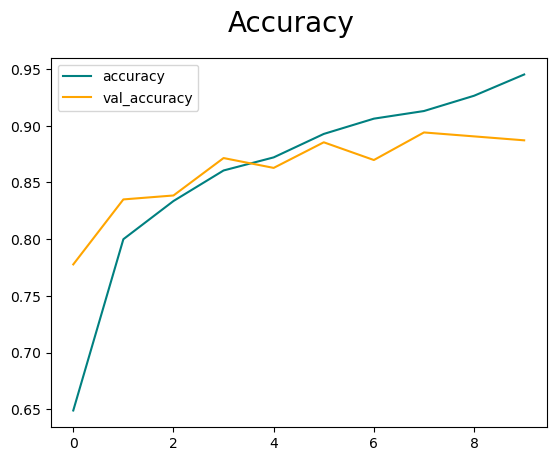

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##### Test veri kümesi üzerinde tahmin yapılıyor ve bu tahminler kullanılarak Precision, Recall ve BinaryAccuracy metrikleri hesaplanıyor.

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 303ms/step


##### Elde edilen metrik sonuçları ekrana yazdırılıyor.

In [26]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.8503937125205994, Recall:0.7152317762374878, Accuracy:0.8062499761581421


##### "female_3.jpg" adlı bir görüntü yükleniyor, yeniden boyutlandırılıyor ve model kullanılarak cinsiyet tahmini yapılıyor.

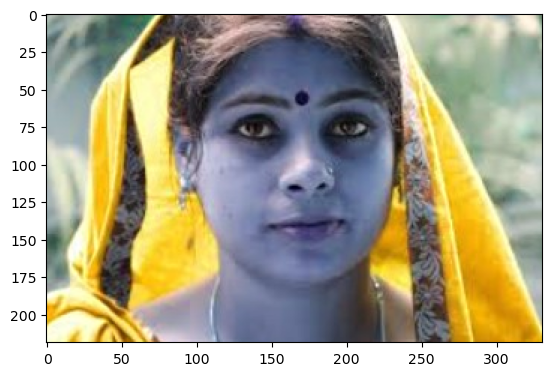

In [98]:
img = cv.imread('female.jpg')
plt.imshow(img)
plt.show()

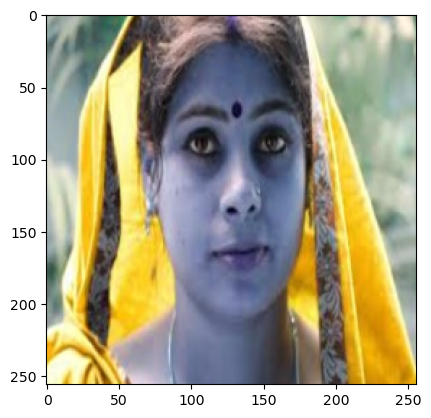

In [99]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [100]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [101]:
yhat

array([[0.03688284]], dtype=float32)

In [102]:
if yhat > 0.5: 
    print(f'Predicted class is Male')
else:
    print(f'Predicted class is Female')

Predicted class is Female


##### Model kaydediliyor ve tekrar yüklenerek tahmin yapılıyor.

In [103]:
from tensorflow.keras.models import load_model

In [104]:
model.save(os.path.join('models','model_1.h5'))

In [105]:
new_model = load_model(os.path.join('models','model_1.h5'))

In [108]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


In [111]:
if yhatnew > 0.5: 
    print(f'Predicted class is Male')
else:
    print(f'Predicted class is Female')

Predicted class is Female
